<a href="https://colab.research.google.com/github/Valkortx/Challenge-ETL-G8-Parte2/blob/main/ETL_G8_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# Exploracion simple
print("Columnas del dataset:")
print(df.columns)
print("\nTipos de datos y nulos:")
print(df.info())
print("\nPrimeras filas:")
print(df.head())

Columnas del dataset:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Primeras filas:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4 

In [2]:
#incoherencias

import pandas as pd

df_customer = pd.json_normalize(df['customer'])
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])

df_flat = pd.concat(
    [df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account],
    axis=1
)


print(df_flat.info())

print(df_flat.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [3]:
#  Unir bloques

df_customer = pd.json_normalize(df['customer'])
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])

df_flat = pd.concat(
    [df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account],
    axis=1
)


#print(df_flat.columns.tolist())
#df_flat.info()

#Limpiezaaaa
df_flat.columns = (
    df_flat.columns
        .str.strip()
        .str.replace(' ', '_', regex=False)
        .str.replace('.', '_', regex=False)
        .str.lower()
)

for col in ['charges_total', 'charges_monthly', 'tenure', 'seniorcitizen']:
    if col in df_flat.columns:
        df_flat[col] = pd.to_numeric(df_flat[col], errors='coerce')

obj_cols = df_flat.select_dtypes(include='object').columns
df_flat[obj_cols] = df_flat[obj_cols].apply(lambda s: s.str.strip().str.lower())

# Unificar categorías equivalentes
replace_map = {
    'y': 'yes', 'si': 'yes',
    'no internet service': 'no',
    'no phone service': 'no'
}
for c in obj_cols:
    df_flat[c] = df_flat[c].replace(replace_map)

df_flat['charges_total'] = df_flat['charges_total'].fillna(0)

In [4]:
#estandarizacion

import pandas as pd
from sklearn.preprocessing import StandardScaler

# binario
bin_map = {'yes': 1, 'no': 0}

df_flat['churn'] = df_flat['churn'].map(bin_map)
df_flat['partner'] = df_flat['partner'].map(bin_map)
df_flat['dependents'] = df_flat['dependents'].map(bin_map)
df_flat['phoneservice'] = df_flat['phoneservice'].map(bin_map)
df_flat['paperlessbilling'] = df_flat['paperlessbilling'].map(bin_map)


rename_map = {
    'charges_monthly': 'facturacion_mensual',
    'charges_total': 'facturacion_total',
    'cuentas_diarias': 'facturacion_diaria'
}
df_flat.rename(columns=rename_map, inplace=True)


In [5]:
# 8) Exportar CSV final de la Parte 1
df_flat.to_csv('telecom_clean.csv', index=False)
print("Archivo guardado: telecom_clean.csv  |  Filas x Columnas:", df_flat.shape)

Archivo guardado: telecom_clean.csv  |  Filas x Columnas: (7267, 21)


In [6]:
import pandas as pd
#MODIFICAR POR DIRECTORIO CORRESPONDIENTE
df_clean = pd.read_csv('telecom_clean.csv')
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerid           7267 non-null   object 
 1   churn                7043 non-null   float64
 2   gender               7267 non-null   object 
 3   seniorcitizen        7267 non-null   int64  
 4   partner              7267 non-null   int64  
 5   dependents           7267 non-null   int64  
 6   tenure               7267 non-null   int64  
 7   phoneservice         7267 non-null   int64  
 8   multiplelines        7267 non-null   object 
 9   internetservice      7267 non-null   object 
 10  onlinesecurity       7267 non-null   object 
 11  onlinebackup         7267 non-null   object 
 12  deviceprotection     7267 non-null   object 
 13  techsupport          7267 non-null   object 
 14  streamingtv          7267 non-null   object 
 15  streamingmovies      7267 non-null   o

In [7]:
# eliminar irrelevantes

print("Total columnas:", len(df_clean.columns))
print(df_clean.columns.tolist())

df_encoded = df_clean.dropna(subset=['churn'])
df_encoded = df_encoded.drop(columns=['customerid'])
print(df_encoded.columns)

Total columnas: 21
['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'facturacion_mensual', 'facturacion_total']
Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'facturacion_mensual', 'facturacion_total'],
      dtype='object')


In [8]:
cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()
print("Columnas a codificar:", cat_cols)
#encoding
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=True)

df_encoded['churn'] = df_encoded['churn'].astype(int)

print("Shape tras OHE:", df_encoded.shape)
print("Columnas no numéricas (debería ser []):",
      df_encoded.select_dtypes(exclude='number').columns.tolist())

Columnas a codificar: ['gender', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paymentmethod']
Shape tras OHE: (7043, 24)
Columnas no numéricas (debería ser []): ['gender_male', 'multiplelines_yes', 'internetservice_fiber optic', 'internetservice_no', 'onlinesecurity_yes', 'onlinebackup_yes', 'deviceprotection_yes', 'techsupport_yes', 'streamingtv_yes', 'streamingmovies_yes', 'contract_one year', 'contract_two year', 'paymentmethod_credit card (automatic)', 'paymentmethod_electronic check', 'paymentmethod_mailed check']


Conteo de clientes por clase:
churn
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes por clase:
churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


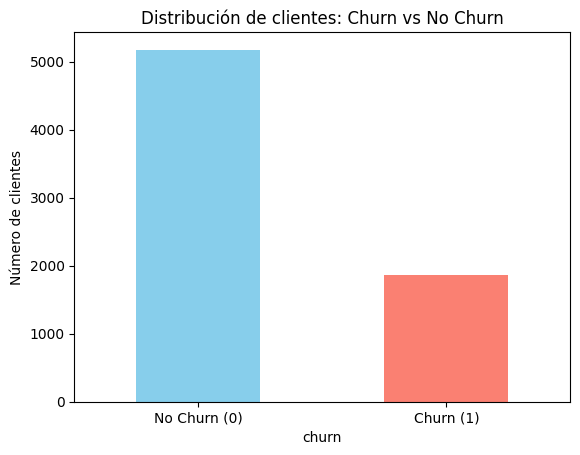

In [9]:
# Distribución de la variable objetivo
conteo = df_encoded['churn'].value_counts()
proporcion = df_encoded['churn'].value_counts(normalize=True)
print("Conteo de clientes por clase:")
print(conteo)
print("\nProporción de clientes por clase:")
print(proporcion)

# Visualización
import matplotlib.pyplot as plt

conteo.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0,1], ['No Churn (0)', 'Churn (1)'], rotation=0)
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes: Churn vs No Churn")
plt.show()


In [10]:
# Normalizar

from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'facturacion_mensual', 'facturacion_total']

df_scaled = df_encoded.copy()

scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print(df_scaled[num_cols].describe().round(2))

        tenure  facturacion_mensual  facturacion_total
count  7043.00              7043.00            7043.00
mean     -0.00                -0.00              -0.00
std       1.00                 1.00               1.00
min      -1.32                -1.55              -1.01
25%      -0.95                -0.97              -0.83
50%      -0.14                 0.19              -0.39
75%       0.92                 0.83               0.66
max       1.61                 1.79               2.83



Correlación con churn (desc):
 churn                  1.000000
facturacion_mensual    0.193356
paperlessbilling       0.191825
seniorcitizen          0.150889
phoneservice           0.011942
partner               -0.150448
dependents            -0.164221
facturacion_total     -0.198324
tenure                -0.352229
Name: churn, dtype: float64


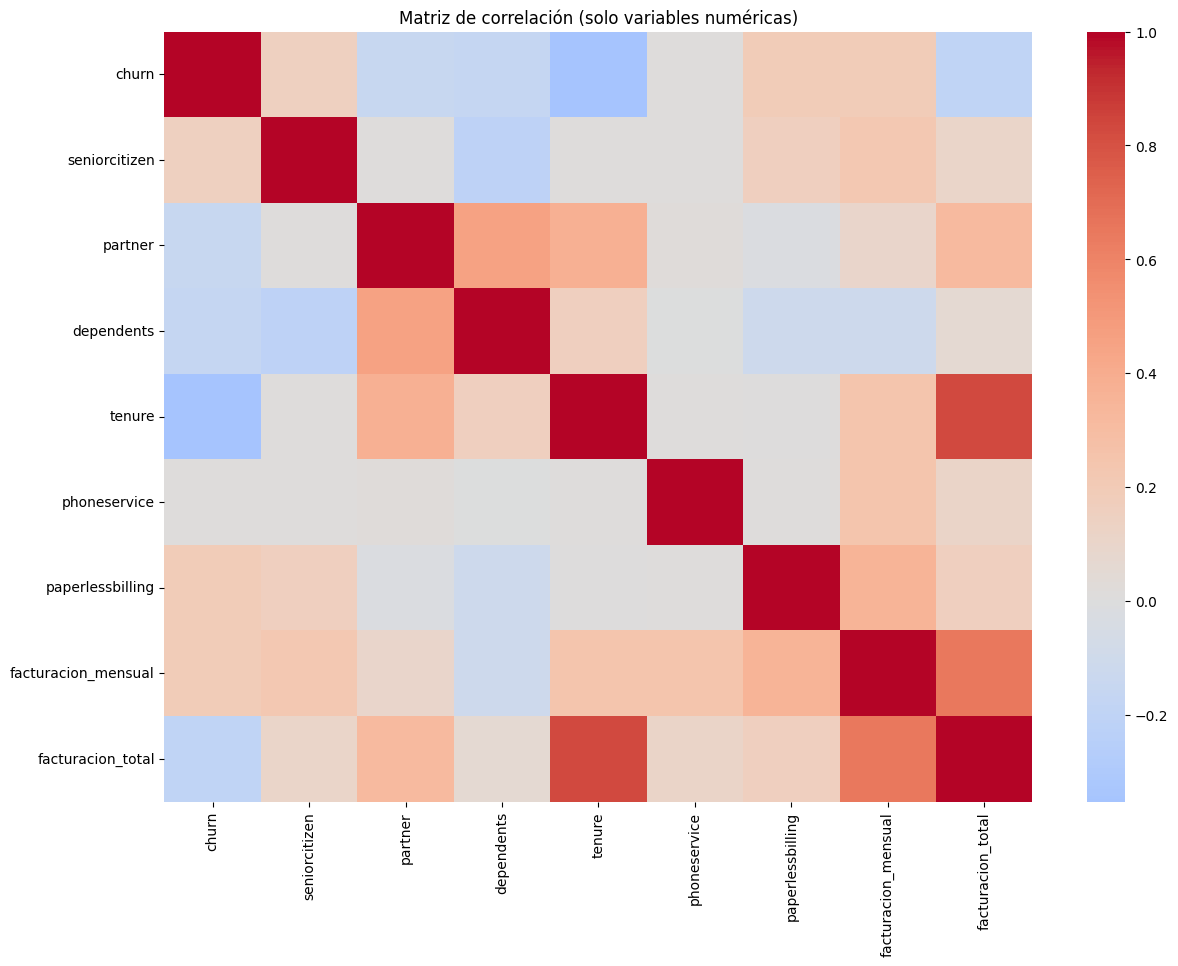

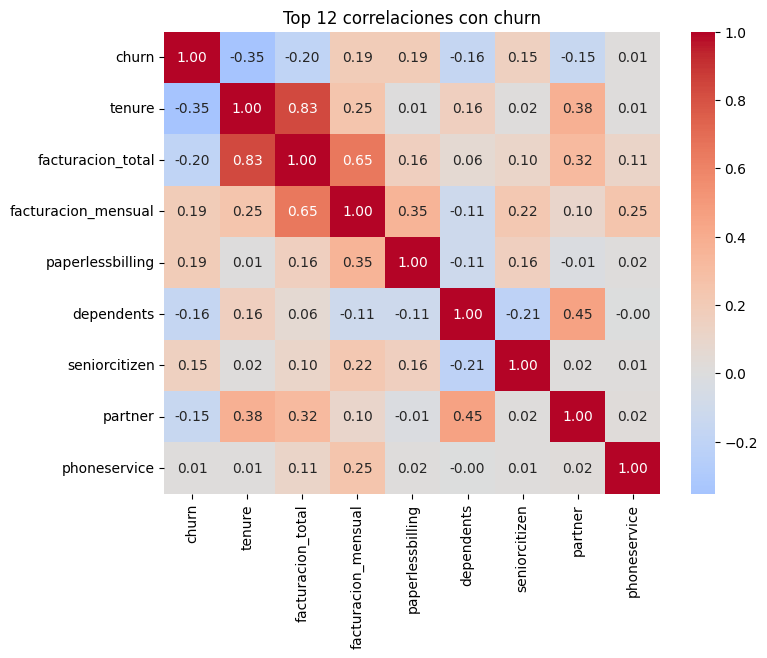

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

num_df = df_scaled.select_dtypes(include=['number'])

corr_matrix = num_df.corr()
corr_with_churn = corr_matrix['churn'].sort_values(ascending=False)
print("\nCorrelación con churn (desc):\n", corr_with_churn)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

# Opcional: ver solo las top 12 variables más correlacionadas con churn
topN = 12
top_features = corr_with_churn.abs().sort_values(ascending=False).head(topN).index
plt.figure(figsize=(8, 6))
sns.heatmap(num_df[top_features].corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title(f"Top {topN} correlaciones con churn")
plt.show()

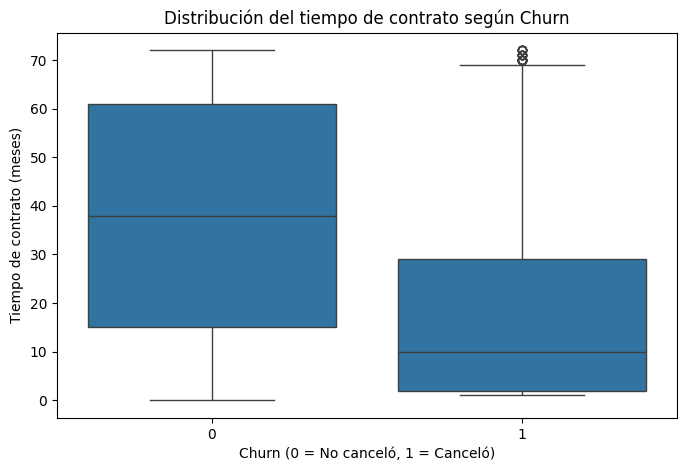

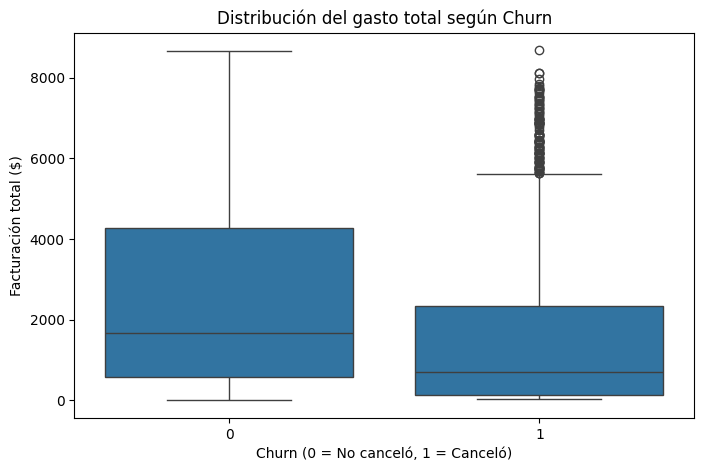

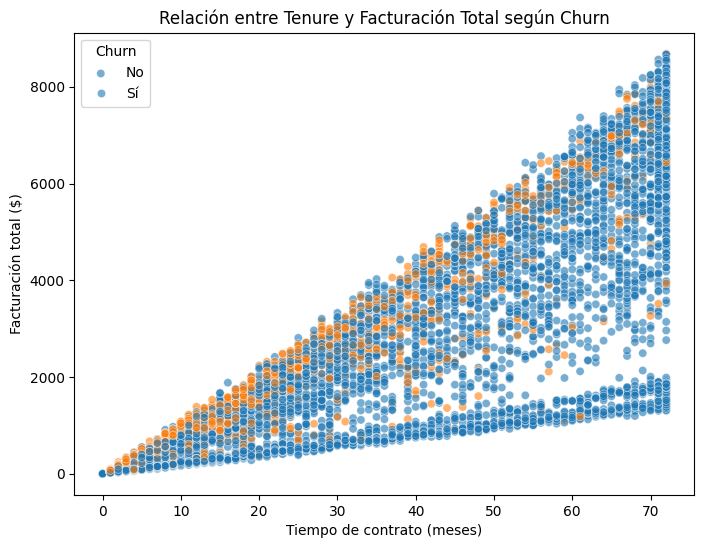

In [12]:

# Boxplot: Tenure vs Churn ---
plt.figure(figsize=(8, 5))
sns.boxplot(x="churn", y="tenure", data=df_encoded)
plt.title("Distribución del tiempo de contrato según Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

# Boxplot: Facturación Total vs Churn ---
plt.figure(figsize=(8, 5))
sns.boxplot(x="churn", y="facturacion_total", data=df_encoded)
plt.title("Distribución del gasto total según Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Facturación total ($)")
plt.show()

# Scatterplot: Tenure vs Facturación Total coloreado por Churn ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x="tenure", y="facturacion_total", hue="churn", data=df_encoded, alpha=0.6)
plt.title("Relación entre Tenure y Facturación Total según Churn")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Facturación total ($)")
plt.legend(title="Churn", labels=["No", "Sí"])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop("churn", axis=1)
y = df_scaled["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamaños
print("Tamaño de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño de prueba:", X_test.shape, y_test.shape)

Tamaño de entrenamiento: (4930, 23) (4930,)
Tamaño de prueba: (2113, 23) (2113,)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Modelo 1: Regresión Logística con normalización
log_reg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])


log_reg_model.fit(X_train, y_train)

y_pred_log = log_reg_model.predict(X_test)

print("Modelo 1: Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Modelo 1: Regresión Logística
Accuracy: 0.7979176526265973
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 2: Random Forest (no requiere normalización)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

print("Modelo 2: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Modelo 2: Random Forest
Accuracy: 0.7832465688594415
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113




 Resultados para Regresión Logística
Exactitud (Accuracy): 0.7979
Precisión: 0.6396
Recall: 0.5472
F1-score: 0.5898

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.8445    0.8885    0.8659      1552
           1     0.6396    0.5472    0.5898       561

    accuracy                         0.7979      2113
   macro avg     0.7420    0.7179    0.7279      2113
weighted avg     0.7901    0.7979    0.7926      2113



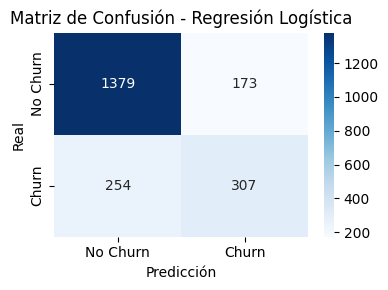


 Resultados para Random Forest
Exactitud (Accuracy): 0.7851
Precisión: 0.6219
Recall: 0.4866
F1-score: 0.5460

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.8280    0.8930    0.8593      1552
           1     0.6219    0.4866    0.5460       561

    accuracy                         0.7851      2113
   macro avg     0.7249    0.6898    0.7026      2113
weighted avg     0.7732    0.7851    0.7761      2113



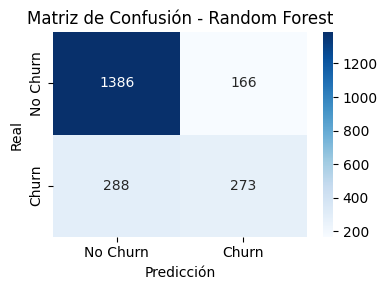


📋 Comparativa de métricas


,Accuracy,Precision,Recall,F1
Modelo,,,,
Regresión Logística,0.7979,0.6396,0.5472,0.5898
Random Forest,0.7851,0.6219,0.4866,0.5460


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Entrenar modelos
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Función de evaluación
def evaluar_modelo(nombre, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n Resultados para {nombre}")
    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Churn","Churn"],
                yticklabels=["No Churn","Churn"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción"); plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    return {"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

#
res_log = evaluar_modelo("Regresión Logística", y_test, y_pred_log)
res_rf  = evaluar_modelo("Random Forest", y_test, y_pred_rf)

comparativa = pd.DataFrame([res_log, res_rf]).set_index("Modelo")
print("\n📋 Comparativa de métricas")
display(comparativa.style.format("{:.4f}"))

In [17]:
def resumen_overfit(nombre, modelo):
    y_tr_pred = modelo.predict(X_train)
    y_te_pred = modelo.predict(X_test)
    acc_tr = accuracy_score(y_train, y_tr_pred)
    acc_te = accuracy_score(y_test, y_te_pred)
    print(f"\n{name}: Accuracy Train={acc_tr:.4f} | Test={acc_te:.4f} | Gap={acc_tr-acc_te:.4f}")

name = "Regresión Logística"
resumen_overfit(name, log_reg)

name = "Random Forest"
resumen_overfit(name, rf)


Regresión Logística: Accuracy Train=0.8108 | Test=0.7979 | Gap=0.0128

Random Forest: Accuracy Train=0.9978 | Test=0.7851 | Gap=0.2126


INTERPRETACION Y CONCLUSION

1. Regresión Logística

  Los coeficientes indican la dirección e intensidad de la relación:

  Coeficientes positivos -> Aumentan la probabilidad de cancelación (churn).
  Ejemplo: clientes con contrato mensual suelen tener coeficientes positivos → mayor riesgo de cancelarse rápido.

  Coeficientes negativos → Reducen la probabilidad de cancelación.
  Ejemplo: clientes con contratos de dos años o que usan ciertos servicios adicionales suelen estar más fidelizados.

  En este modelo suelen destacar:

  Tiempo de permanencia (tenure) -> coeficiente negativo (a más tiempo con la empresa, menor probabilidad de churn).

  Facturación total → negativo (quienes gastan más tienden a quedarse).

  Contract / Payment Method → suelen salir positivos en opciones como “mensual” o “pago electrónico” (clientes más volátiles).

2. Random Forest

  Random Forest no usa coeficientes, sino importancia de variables (qué tanto ayudan a separar clases en los árboles).

  Variables más relevantes suelen ser:

  Tenure (tiempo de contrato) → aparece como muy importante.

  Tipo de contrato (Contract) → una de las que más influye.

  Facturación mensual → clientes con facturas altas tienden a cancelar más.

  Servicios de Internet (InternetService, OnlineSecurity, TechSupport) → reflejan si el cliente percibe valor agregado.

Comparando ambos modelos

  * Coincidencias:
    * Ambos modelos tienden a resaltar tenure, contract, facturación mensual como las variables más determinantes.

  * Diferencias:

    * La Regresión Logística te da una visión más interpretable (positivo/negativo = aumenta o disminuye churn).

    * El Random Forest detecta interacciones no lineales: por ejemplo, clientes con alto gasto mensual + contrato mensual → riesgo alto de churn, aunque por separado esas variables no sean tan claras.

#  Informe de Resultados – Predicción de Cancelación de Clientes (Churn)

## 1. Rendimiento de los Modelos

Se evaluaron dos modelos de clasificación: **Regresión Logística** y **Random Forest**.  

- **Regresión Logística**  
  - Exactitud en entrenamiento: 0.8108  
  - Exactitud en prueba: 0.7979  
  - Diferencia (Gap): 0.0128 → Indica buen equilibrio y baja tendencia al *overfitting*.  
  - Precisión: 0.6396  
  - Recall: 0.5472  
  - F1-score: 0.5898  

- **Random Forest**  
  - Exactitud en entrenamiento: 0.9978  
  - Exactitud en prueba: 0.7851  
  - Diferencia (Gap): 0.2126 → Señales claras de *overfitting*.  
  - Precisión: 0.6219  
  - Recall: 0.4866  
  - F1-score: 0.5460  

**Conclusión:** La regresión logística mostró un rendimiento más balanceado y generalizable, mientras que el Random Forest sobreajustó a los datos de entrenamiento, reduciendo su capacidad de generalización.

---

## 2. Variables más Influyentes en la Cancelación

### Regresión Logística  
El análisis de los coeficientes indica que:  
- **Tenure (tiempo de contrato):** cuanto menor es, mayor probabilidad de cancelación.  
- **Facturación mensual (MonthlyCharges):** valores altos se asocian a mayor churn.  
- **Facturación total (TotalCharges):** valores bajos se asocian con mayor churn, indicando cancelación temprana.  
- **Paperless Billing (facturación electrónica):** correlacionada positivamente con churn.  
- **Dependents / Partner:** clientes con dependientes o pareja presentan menor probabilidad de cancelar.  

### Random Forest  
La importancia de variables confirma:  
- **Tenure** y **TotalCharges** son las más relevantes para explicar la retención.  
- **MonthlyCharges** también es clave, indicando sensibilidad al precio.  
- **Paperless Billing** y características contractuales influyen en la decisión de cancelar.  

---

## 3. Principales Factores de Cancelación

- **Factores de riesgo:**  
  - Tiempo de contrato bajo (clientes nuevos).  
  - Alta facturación mensual.  
  - Uso de facturación electrónica.  
  - Clientes sin pareja ni dependientes.  

- **Factores protectores:**  
  - Larga permanencia.  
  - Alta facturación total (clientes fidelizados).  
  - Clientes con pareja o dependientes.  

---

## 4. Estrategias de Retención

1. **Fidelización temprana**  
   - Ofrecer beneficios en los primeros 12 meses (descuentos, upgrades, bonos de permanencia).  

2. **Segmentación por precio**  
   - Diseñar planes más flexibles o escalonados para clientes con facturación mensual alta.  

3. **Beneficios progresivos**  
   - Crear recompensas acumulativas en función de la facturación total (ej. programas de lealtad).  

4. **Planes familiares**  
   - Descuentos especiales para clientes con pareja o dependientes.  

5. **Atención preferente a seniors**  
   - Ofrecer soporte simplificado y planes adaptados a adultos mayores.  

6. **Experiencia digital diferenciada**  
   - Para clientes con facturación electrónica, ofrecer beneficios online y mejorar la interacción digital.  

---

## 5. Conclusiones Finales

- La **Regresión Logística** resulta más confiable para generalizar predicciones en este conjunto de datos.  
- Los **factores clave de cancelación** son la permanencia (tenure), la facturación (mensual y total) y el tipo de facturación.  
- La **estrategia de retención** debe enfocarse en:  
  - Aumentar la fidelización temprana.  
  - Ajustar planes de precios para clientes sensibles al costo.  
  - Incentivar permanencia mediante beneficios progresivos y familiares.  

---
